# Solution Part:
* Data Understanding
* Data Exploration
* Data Cleaning
* Data Preparation/Feature Engineering
* Model Building
* Model Evaluation

In [1]:
#Import all the libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Read the dataset
cars = pd.read_csv('AAAG Database.csv', encoding='latin1')
cars_test = pd.read_excel('top 1000 AAA Data.xlsx')

In [4]:
cars.head()

,VRSELLTYPE,VRSALEDATE,SALEDATE_MonthofYearNumber,VRSALEAMT,VRMILEAGE,VRLOCATION,Vehicle_year,Vehicle_cylinders,Vehicle_botcolor,Vehicle_doors,...,Vehicle_engine,Vehicle_drive,Vehicle_condition_crstatus,Vehicle_condition_drivable,Vehicle_condition_overall,Vehicle_condition_grade_1,Vehicle_condition_grade_2,Misc_SalesChannel,Make,Model
0,C,20240501,5,2800,85224,TAMPA,2009,6,WHT,4,...,3.6,F,Y,Y,NaN,0.0,0.0,IN LANE,NaN,NaN
1,C,20240612,6,4200,108704,TAMPA,2016,4,GRY,4,...,1.6,F,C,Y,4.0,3.9,3.6,IN LANE,NaN,NaN
2,C,20240223,2,7500,150248,AUSTINMOBILE,2010,6,SIL,4,...,3.5,F,P,NaN,NaN,0.0,0.0,IN LANE,NaN,NaN
3,L,20240523,5,1700,144198,PITTSBURGH,2012,4,SIL,4,...,2.4,F,C,Y,2.0,0.0,1.7,IN LANE,NaN,NaN
4,L,20240410,4,15200,38080,LASVEGAS,2017,4,BLK,4,...,2.3,A,C,Y,4.0,3.5,3.5,IN LANE,NaN,NaN


In [5]:
cars_test.head()

,VRSELLTYPE,VRSALEDATE,SALEDATE_MonthofYearNumber,VRSALEAMT,VRMILEAGE,VRLOCATION,Vehicle_year,Vehicle_cylinders,Vehicle_botcolor,Vehicle_doors,...,Vehicle_engine,Vehicle_drive,Vehicle_condition_crstatus,Vehicle_condition_drivable,Vehicle_condition_overall,Vehicle_condition_grade_1,Vehicle_condition_grade_2,Misc_SalesChannel,Make,Model
0,C,20250611,6,47000,34258,SHREVEPORT,2022,6,BLU,4,...,3.5,4,Y,Y,NaN,0.0,0.0,IN LANE,FORD,F-150
1,C,20250611,6,18700,96569,SHREVEPORT,2019,4,WHT,4,...,1.5,F,Y,Y,NaN,0.0,0.0,IN LANE,HONDA,CR-V
2,C,20250611,6,6900,123079,LANCASTER,2013,6,BLK,4,...,3.5,A,O,Y,NaN,0.0,0.0,IN LANE,ACURA,RDX
3,C,20250611,6,2600,162659,BOSTON,2016,4,GRN,4,...,2.5,A,NaN,NaN,NaN,NaN,NaN,IN LANE,NISSAN,ROGUE
4,L,20250611,6,9500,108450,MORTON,2019,4,BLU,4,...,2.5,F,C,Y,4.0,4.4,4.4,IN LANE,MAZDA,CX-5


In [6]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [7]:
pd.set_option('display.max_rows', None)

Data Exploration

In [8]:
cars_numeric = cars.select_dtypes(include=['float64','int64'])

In [9]:
cars_numeric.corr()

,VRSALEDATE,SALEDATE_MonthofYearNumber,VRSALEAMT,VRMILEAGE,Vehicle_year,Vehicle_cylinders,Vehicle_doors,Vehicle_engine,Vehicle_condition_overall,Vehicle_condition_grade_1,Vehicle_condition_grade_2
VRSALEDATE,1.000000,-0.409754,0.021166,-0.005516,-0.076537,-0.012148,-0.033502,0.002062,0.019346,0.038524,0.180888
SALEDATE_MonthofYearNumber,-0.409754,1.000000,-0.011133,0.004485,0.039922,0.002523,0.018551,0.000406,-0.011336,0.003755,0.029248
VRSALEAMT,0.021166,-0.011133,1.000000,-0.572669,0.021003,0.200128,-0.020586,0.003418,0.517078,0.248999,0.206390
VRMILEAGE,-0.005516,0.004485,-0.572669,1.000000,-0.004473,0.165032,0.012439,-0.025473,-0.396392,-0.323382,-0.265743
Vehicle_year,-0.076537,0.039922,0.021003,-0.004473,1.000000,0.264178,0.517326,-0.002068,0.017452,-0.032639,-0.041128
Vehicle_cylinders,-0.012148,0.002523,0.200128,0.165032,0.264178,1.000000,0.022367,-0.002644,0.007036,-0.049586,-0.050775
Vehicle_doors,-0.033502,0.018551,-0.020586,0.012439,0.517326,0.022367,1.000000,-0.091625,0.031841,0.001019,-0.005458
Vehicle_engine,0.002062,0.000406,0.003418,-0.025473,-0.002068,-0.002644,-0.091625,1.000000,0.000166,-0.009630,-0.007056
Vehicle_condition_overall,0.019346,-0.011336,0.517078,-0.396392,0.017452,0.007036,0.031841,0.000166,1.000000,0.750980,0.529821
Vehicle_condition_grade_1,0.038524,0.003755,0.248999,-0.323382,-0.032639,-0.049586,0.001019,-0.009630,0.750980,1.000000,0.734380


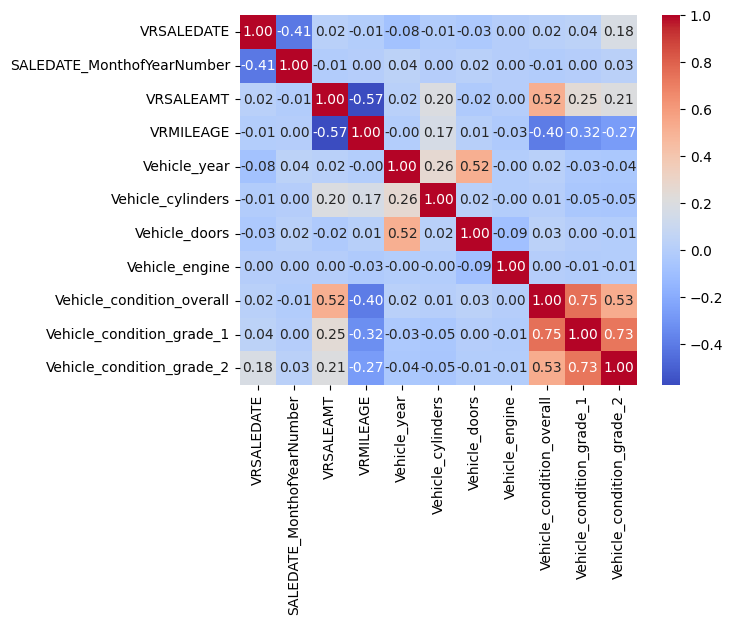

In [10]:
sns.heatmap(cars_numeric.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

In [11]:
#Correlation plot
cor = cars_numeric.corr()
cor

,VRSALEDATE,SALEDATE_MonthofYearNumber,VRSALEAMT,VRMILEAGE,Vehicle_year,Vehicle_cylinders,Vehicle_doors,Vehicle_engine,Vehicle_condition_overall,Vehicle_condition_grade_1,Vehicle_condition_grade_2
VRSALEDATE,1.000000,-0.409754,0.021166,-0.005516,-0.076537,-0.012148,-0.033502,0.002062,0.019346,0.038524,0.180888
SALEDATE_MonthofYearNumber,-0.409754,1.000000,-0.011133,0.004485,0.039922,0.002523,0.018551,0.000406,-0.011336,0.003755,0.029248
VRSALEAMT,0.021166,-0.011133,1.000000,-0.572669,0.021003,0.200128,-0.020586,0.003418,0.517078,0.248999,0.206390
VRMILEAGE,-0.005516,0.004485,-0.572669,1.000000,-0.004473,0.165032,0.012439,-0.025473,-0.396392,-0.323382,-0.265743
Vehicle_year,-0.076537,0.039922,0.021003,-0.004473,1.000000,0.264178,0.517326,-0.002068,0.017452,-0.032639,-0.041128
Vehicle_cylinders,-0.012148,0.002523,0.200128,0.165032,0.264178,1.000000,0.022367,-0.002644,0.007036,-0.049586,-0.050775
Vehicle_doors,-0.033502,0.018551,-0.020586,0.012439,0.517326,0.022367,1.000000,-0.091625,0.031841,0.001019,-0.005458
Vehicle_engine,0.002062,0.000406,0.003418,-0.025473,-0.002068,-0.002644,-0.091625,1.000000,0.000166,-0.009630,-0.007056
Vehicle_condition_overall,0.019346,-0.011336,0.517078,-0.396392,0.017452,0.007036,0.031841,0.000166,1.000000,0.750980,0.529821
Vehicle_condition_grade_1,0.038524,0.003755,0.248999,-0.323382,-0.032639,-0.049586,0.001019,-0.009630,0.750980,1.000000,0.734380


Data Preparation

In [12]:
cars = cars.drop(['Vehicle_condition_grade_1','Vehicle_condition_grade_2'], axis=1)
cars_test = cars_test.drop(['Vehicle_condition_grade_1','Vehicle_condition_grade_2'], axis=1, errors='ignore')

In [13]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute   import SimpleImputer
from sklearn.metrics import r2_score, mean_absolute_error

In [14]:
# remove engine from your list of categoricals...
categorical_feats = [
    'VRSELLTYPE','VRLOCATION','Vehicle_botcolor','Vehicle_trantype',
    'Make','Model','Vehicle_btext','Vehicle_airbag',
    'Vehicle_drive','Vehicle_condition_crstatus','Vehicle_condition_drivable',
    'Misc_SalesChannel'
]

# …and add it into numeric_feats
numeric_feats = [
    'VRMILEAGE','SALEDATE_MonthofYearNumber','Vehicle_year',
    'Vehicle_cylinders','Vehicle_doors','Vehicle_condition_overall',
    'Vehicle_engine'
]

In [15]:
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scale',   StandardScaler())
])

cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('ohe',      OneHotEncoder(handle_unknown='ignore', sparse_output=True))
])

preprocessor = ColumnTransformer([
    ('num', num_pipe, numeric_feats),
    ('cat', cat_pipe, categorical_feats),
], remainder='drop', sparse_threshold=1.0)

In [16]:
# 4) Full pipeline with RF
pipeline = Pipeline([
    ('preproc', preprocessor),
    ('rf',      RandomForestRegressor(
                    n_estimators=231,
                    max_depth=40,
                    min_samples_leaf=2,
                    max_features='log2',
                    random_state=42
               ))
])

In [17]:
# 5) Fit!
X_train = cars[numeric_feats + categorical_feats]
y_train = cars['VRSALEAMT']
pipeline.fit(X_train, y_train)    # should now run without the NaN error

Pipeline(steps=[('preproc',
                 ColumnTransformer(sparse_threshold=1.0,
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['VRMILEAGE',
                                                   'SALEDATE_MonthofYearNumber',
                                                   'Vehicle_year',
                                                   'Vehicle_cylinders',
                                                   'Vehicle_doors',
                                                   'Vehicle_condition_overall',
                                                   'Vehicle_engine']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer'...
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['VRSELLTYPE', 'VRLOCATION',
                                                   'Vehicle_botcolor',
                                                   'Vehicle_trantype', 'Make',
                                                   'Model', 'Vehicle_btext',
                                                   'Vehicle_airbag',
                                                   'Vehicle_drive',
                                                   'Vehicle_condition_crstatus',
                                                   'Vehicle_condition_drivable',
                                                   'Misc_SalesChannel'])])),
                ('rf',
                 RandomForestRegressor(max_depth=40, max_features='log2',
                                       min_samples_leaf=2, n_estimators=231,
                                       random_state=42))])

In [18]:
# 6a. …and get predictions directly on new data:
X_test = cars_test[numeric_feats + categorical_feats]
rf_predictions = pipeline.predict(X_test)

In [19]:

# 6b. If you ever just want the transformed feature‐matrix:
X_new_transformed = pipeline.named_steps['preproc'].transform(X_test)

XGBoost

In [20]:
from xgboost import XGBRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [21]:
xgb = XGBRegressor(
    n_estimators=292,
    max_depth=10,
    learning_rate=0.0769936478290876,
    min_child_weight=6,
    subsample=0.8553774408813275,
    colsample_bytree=0.9456452572230258,
    random_state=42
)

In [22]:
xgb_pipeline = Pipeline([
    ('preproc', preprocessor),
    ('xgb',     xgb)
])

In [23]:
# 3. Fit & predict just like before
X_train = cars[numeric_feats + categorical_feats]
y_train = cars['VRSALEAMT']

xgb_pipeline.fit(X_train, y_train)

xgb_new = cars_test[numeric_feats + categorical_feats]
xgb_predictions = xgb_pipeline.predict(xgb_new)

Model Combination

In [24]:
import optuna
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.model_selection import cross_val_score

In [25]:
# Define the base models with fixed parameters
rf = RandomForestRegressor(
    n_estimators=231,
    max_depth=40,
    min_samples_split=2,
    min_samples_leaf=2,
    max_features='log2',
    random_state=42
)

xgb = XGBRegressor(
    n_estimators=292,
    max_depth=10,
    learning_rate=0.0769936478290876,
    min_child_weight=6,
    subsample=0.8553774408813275,
    colsample_bytree=0.9456452572230258,
    random_state=42
)

In [26]:
# 3) Build the stacking regressor
stack = StackingRegressor(
    estimators=[
        ('rf',  rf),
        ('xgb', xgb)
    ],
    final_estimator=XGBRegressor(
        n_estimators=50,
        learning_rate=0.1,
        random_state=42
    ),
    # passthrough=True  # if you want the original features concatenated to meta‑features
)

# 4) Put it all in one pipeline
stacking_pipeline = Pipeline([
    ('preproc', preprocessor),
    ('stack',   stack)
])

# 5) Fit & evaluate
X_train = cars[numeric_feats + categorical_feats]
y_train = cars['VRSALEAMT']
X_test  = cars_test[numeric_feats + categorical_feats]
y_test  = cars_test['VRSALEAMT']  # assuming you have ground‑truth here

stacking_pipeline.fit(X_train, y_train)
y_pred = stacking_pipeline.predict(X_test)

print("Stacked R²:", r2_score(y_test, y_pred))

Stacked R²: 0.9406396746635437


Visualize the actual prices and Predicted prices

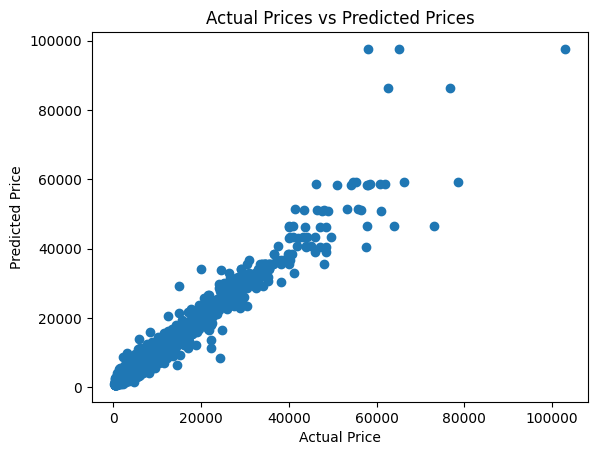

In [27]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

Final Model Evaluation

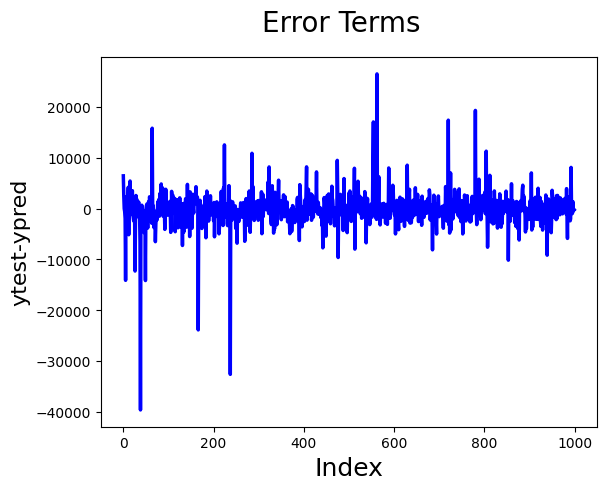

In [28]:
# Error terms
c = [i for i in range(len(y_pred))]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label
plt.show()

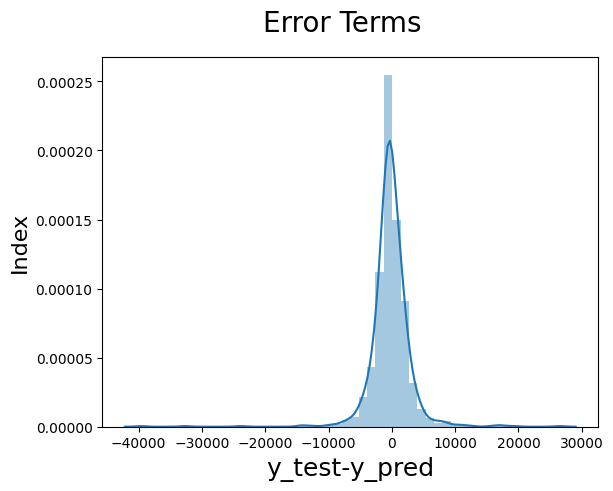

In [29]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_test-y_pred),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label
plt.show()

Export the Predictions

In [30]:
import pandas as pd

# Create a DataFrame with the original prices and the predicted sales prices
result_df = pd.DataFrame({
    'SoldPrice': y_test,  # Original prices from y_test
    'XGB_Predictions': xgb_predictions,
    'RF_Predictions': rf_predictions,
    'Stacked_Predictions': y_pred
})

# Export the DataFrame to a CSV file
result_df.to_excel('2025 Sample Price Predictions 3.xlsx', index=False)